# Простые нейронные сети

# Делаем импорты

In [1]:
import numpy
import keras
from keras import backend as K
from keras.datasets import mnist, cifar10
from keras.utils import np_utils
import tensorflow as tf

import matplotlib.pyplot as plt
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

from keras.layers import Dense, Dropout,Flatten
from keras.layers.core import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
import pandas as pd

K.set_image_data_format('channels_last')
numpy.random.seed(0)

Using TensorFlow backend.


In [2]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})

# Немного про бэкэнды Кераса и сессии

### Бэкэнды могут быть разные, можно смотреть, какие именно девайсы у вас подключены

In [3]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9883308669941194466
]


# Посмотрим на данные

### В этой части мы берем датасет MNIST

In [5]:
train, test = mnist.load_data()

x_train = train[0]
y_train = train[1]

x_test = test[0]
y_test = test[1]

In [6]:
x_train.shape

(60000, 28, 28)

## На данные круто смотреть глазами

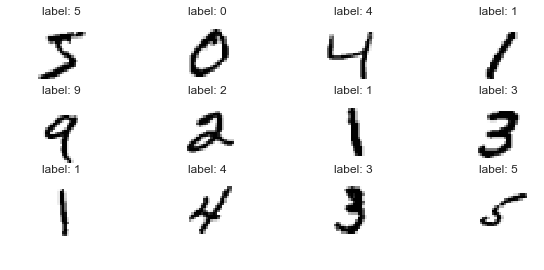

In [7]:
images_and_labels = list(zip(x_train,  y_train))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label )

In [8]:
# the data, split between train and test sets
num_classes = 10
batch_size = 128
epochs = 10

x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


(60000, 'train samples')
(10000, 'test samples')


# Строим модель

In [9]:
model = Sequential()

In [10]:
model.add(Dense(1024, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(optimizer="adam",
                loss='categorical_crossentropy',
                 metrics=["accuracy"])

In [12]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.2351 - acc: 0.9315 - val_loss: 0.1213 - val_acc: 0.9629
Epoch 2/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0922 - acc: 0.9731 - val_loss: 0.0833 - val_acc: 0.9742
Epoch 3/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0559 - acc: 0.9828 - val_loss: 0.0636 - val_acc: 0.9807
Epoch 4/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0392 - acc: 0.9885 - val_loss: 0.0659 - val_acc: 0.9777
Epoch 5/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0273 - acc: 0.9917 - val_loss: 0.0608 - val_acc: 0.9808
Epoch 6/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0185 - acc: 0.9951 - val_loss: 0.0676 - val_acc: 0.9791
Epoch 7/10
60000/60000 [==============================] - 10s 160us/step 

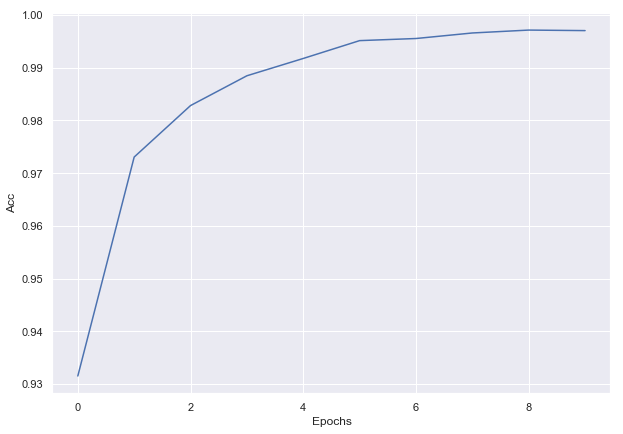

In [13]:
plt.plot(range(len(history.history['acc'])), history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

## Как еще можно делать колбэки

In [14]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

# Возьмем модель помощнее

In [15]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.2469 - acc: 0.9253 - val_loss: 0.1014 - val_acc: 0.9680
Epoch 2/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0977 - acc: 0.9699 - val_loss: 0.0802 - val_acc: 0.9745
Epoch 3/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0720 - acc: 0.9771 - val_loss: 0.0712 - val_acc: 0.9765
Epoch 4/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0548 - acc: 0.9823 - val_loss: 0.0745 - val_acc: 0.9765
Epoch 5/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0469 - acc: 0.9853 - val_loss: 0.0645 - val_acc: 0.9804
Epoch 6/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0404 - acc: 0.9870 - val_loss: 0.0634 - val_acc: 0.9808
Epoch 7/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0318 - acc: 0.9892 - val_loss: 0.

('Test loss:', 0.07317304076625188)
('Test accuracy:', 0.9809)


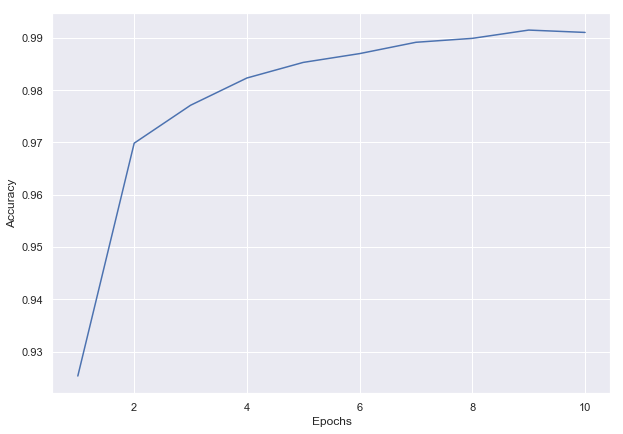

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, len(history.acc)+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()